In [1]:
#This section loads the csv file into a numpy data matrix
import numpy as np
import matplotlib.pyplot as plt
import sys
import csv

data = [] # Create empty data matrix

#Load csv file into data --- 
with open('digitData.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if len(row) != 0:
            data = data + [row]
#---

data =  np.asarray(data) #Convert regular array to numpy array.
print(data)
print("done")

[['label' 'pixel0' 'pixel1' ..., 'pixel781' 'pixel782' 'pixel783']
 ['1' '0' '0' ..., '0' '0' '0']
 ['0' '0' '0' ..., '0' '0' '0']
 ..., 
 ['7' '0' '0' ..., '0' '0' '0']
 ['6' '0' '0' ..., '0' '0' '0']
 ['9' '0' '0' ..., '0' '0' '0']]
done


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 171 253 253 170  63
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  73  73 176 237 253 252 252 252 238
  175  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  27 120 252 252 252 252 237 215 221 252 253
  252  71   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 181 252 252 252 252 252  62   0  16 190 253
  252  71   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 119 252 205 103   0   0   0   0  1

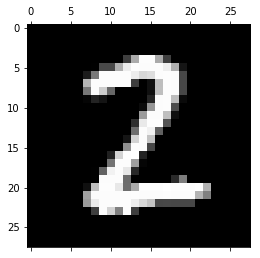

'for x in range(28):\n    for y in range(28):\n        sys.stdout.write(displayPixelValues[x,y].astype(np.str) + ",")\n    print()'

In [2]:
#Cell used to visualize data as a human does
displayPixelValues = data[23][1:]  #Gather all pixel values from first data point

displayPixelValues = np.reshape(displayPixelValues, (-1, 28)) #Reshape data to 28 by 28 array instead of 784 by 1 array
displayPixelValues = displayPixelValues.astype(np.int) #Convert the data into integers from strings
print(displayPixelValues) #Print out array of single digit

plt.matshow(displayPixelValues, fignum=10,cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit

"""for x in range(28):
    for y in range(28):
        sys.stdout.write(displayPixelValues[x,y].astype(np.str) + ",")
    print()"""


In [3]:
def sigmoid(x):
    #If overflow error, return small values for zero
    return 1/(1+np.exp(-x))

In [54]:
np.random.seed(2)

layer0_neurons = 784 #Number of pixels = 784
layer1_neurons = 30 #Number of middle layer neurons. I picked 30 for now
layer2_neurons = 10 #Output neurons here. 
                    #The activation of the output neurons are the "guesses"
#Initialize random weights and biases

layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 784 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) /100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 30 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) /100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

In [5]:
#Matrix Calculation of Forward Propogation
#
trainingSize = 1000 #Number of training sample
Xdata = data[1:trainingSize+1,1:] #Get pixel values of data samples
Xdata = Xdata.T #Transpose - Make columns rows and rows columns
Xdata = Xdata.astype(np.int) #Convert values from string to integer
Xdata = Xdata/255 #Remap grayscale values (normalize)

labels = data[1:,0].astype(np.int)  #Get labels of each digit an numpy list

Xdata.shape



(784, 1000)

In [6]:
# FP
z_1 = np.dot(layer1_w,Xdata)+layer1_b
a_1 = sigmoid(z_1)

z_2 = np.dot(layer2_w,a_1)+layer2_b
a_2 = sigmoid(z_2)

print("activation 2:")
print(a_2)

activation 2:
[[ 0.50221147  0.50237385  0.50216941 ...,  0.50217624  0.50202286
   0.50215832]
 [ 0.50887489  0.50890915  0.50881077 ...,  0.5088913   0.50887893
   0.50890009]
 [ 0.49584275  0.49617522  0.49580917 ...,  0.49574381  0.49578623
   0.49581402]
 ..., 
 [ 0.50061857  0.5006645   0.5005805  ...,  0.50042097  0.50046936
   0.50047225]
 [ 0.50225205  0.50234564  0.5021646  ...,  0.50218009  0.50222763
   0.50210421]
 [ 0.49708186  0.49735863  0.49709065 ...,  0.49701233  0.49704943
   0.49718249]]


In [50]:
#Accuracy Calculation
testSize = 100
predictions = []
for i in range(testSize):
    maxIndex = 0
    maxValue = a_2[0,i]
    for j in range(a_2[:,i].size):
        if(a_2[j,i] > maxValue):
            maxIndex = j
            maxValue = a_2[j,i]
    #print("highest a_2 value for digit",i,": ", maxValue)
    
    predictions.append(maxIndex)

#print("predictions: ")
#print(predictions)

correct = 0
total = trainingSize+1 
for i in range(testSize):
    if(labels[i] == predictions[i]):
        correct+=1
accuracy = round(((correct/total)*100),2)
print(str(accuracy) + '% Accurate')
print(a_2)
print("predictions: ",predictions)

9.99% Accurate
[[  1.82113590e-09   9.93171032e-01   3.94543812e-09 ...,   1.65509255e-07
    9.57266816e-03   3.84473872e-05]
 [  9.94227871e-01   2.11329904e-08   9.98859692e-01 ...,   5.67321655e-03
    2.46121537e-05   9.30775819e-06]
 [  8.91421781e-04   1.97624100e-03   7.96294186e-03 ...,   4.95478662e-09
    3.04634385e-03   3.17500676e-05]
 ..., 
 [  1.04472846e-03   3.15520536e-04   3.36791277e-03 ...,   2.19598980e-03
    5.79347259e-07   5.01027297e-03]
 [  4.54223639e-03   4.05653553e-05   5.01585129e-04 ...,   1.49442323e-03
    1.26498741e-06   8.81851622e-06]
 [  5.60552595e-04   2.82465982e-04   1.94811813e-04 ...,   9.93364262e-01
    5.12744778e-06   6.14545623e-03]]
predictions:  [1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6, 2, 0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 9, 1, 4, 4, 2, 6, 3, 7, 7, 4, 7, 5, 1, 9, 0, 2, 2, 3, 9, 1, 1, 1, 5, 0, 6, 3, 4, 8, 1, 0, 3, 9, 6, 2, 6, 4, 7, 1, 4, 1, 5, 4, 8, 9, 2, 9, 9, 8, 9, 6, 3, 6, 4, 6, 2, 9, 1,

In [8]:
#Squared Error Sum Calculation Used in Back Propogation

errors = a_2.copy() #Copy elements of activation_2 into errors
for d in range(trainingSize):
    target = labels[d] #Get label of current digit
    errors[target][d] = 1 - a_2[target][d] #Get error of index of target value
    squaredErrorSum = 0 
    for e in range(errors[:,d].size):
        squaredErrorSum += (errors[e][d] ** 2) #Sum up errors and square them
   # print("Squared error sum for digit ",d," is: ",squaredErrorSum)
    
#print('a2: \n',a_2)
#print("errors: \n",errors)



In [9]:
def der_sigmoid(x):
    return (sigmoid(x)*(1-sigmoid(x)))

der_sigmoid(a_2)


array([[ 0.23487619,  0.23486681,  0.23487862, ...,  0.23487823,
         0.23488709,  0.23487926],
       [ 0.23448912,  0.23448712,  0.23449286, ...,  0.23448816,
         0.23448888,  0.23448765],
       [ 0.23524216,  0.23522315,  0.23524408, ...,  0.23524781,
         0.23524539,  0.2352438 ],
       ..., 
       [ 0.23496809,  0.23496544,  0.23497028, ...,  0.23497947,
         0.23497669,  0.23497652],
       [ 0.23487385,  0.23486844,  0.2348789 , ...,  0.234878  ,
         0.23487526,  0.23488239],
       [ 0.23517126,  0.2351554 ,  0.23517076, ...,  0.23517524,
         0.23517312,  0.2351655 ]])

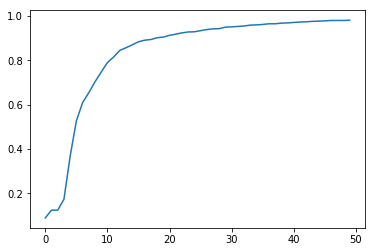

In [96]:
#Graphing accuracy

plt.plot(accList) #Put error/accuracy percentages in here
plt.show()


In [30]:
def cross_entropy_cost(y, a):
    error = np.multiply(y,np.log(a)) + np.multiply((1-y),np.log((1-a)))
    errorSum = np.sum(error)
    meanErrorSum = -errorSum/(y.shape[1])
    return meanErrorSum

In [33]:
target = np.zeros([10,trainingSize])
for i in range(trainingSize):
    target[labels[i],i] = 1
cost = cross_entropy_cost(target,a_2)
print(cost)

226.246360709


In [94]:
#Initialize random weights and biases
layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 784 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) /100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 30 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) /100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

accList=[]

iterations = 500
for i in range(iterations):
    # FP
    z_1 = np.dot(layer1_w,Xdata)+layer1_b
    a_1 = sigmoid(z_1)

    z_2 = np.dot(layer2_w,a_1)+layer2_b
    a_2 = sigmoid(z_2)


    cost = cross_entropy_cost(target,a_2)
    if(i % 10 == 0):
        #print(cost)
        acc = evaluateNetworkAccuracy(Xdata,labels[0:trainingSize],layer1_w,layer1_b,layer2_w,layer2_b)
        accList.append(acc)
        print('Iter','Acc: ', acc)
        
    #Back Prop
    learningRate = 0.00075
    #Change to all with functions #Dimensions
    der_a2 = -np.divide(target,a_2) + np.divide(1-target, 1-a_2)
    der_z2 = der_a2*a_2*(1-a_2)
    der_w2 = np.dot(der_z2,a_1.T)
    der_b2 = 0*np.sum(der_z2,axis = 1,keepdims=True)/trainingSize
    der_a1 = np.dot(layer2_w.T,der_z2)
    der_z1 = der_a1*a_1*(1-a_1)
    der_w1 = np.dot(der_z1,Xdata.T)
    der_b1 = 0*np.sum(der_z1,axis = 1,keepdims=True)/trainingSize

    layer2_w = layer2_w - learningRate*der_w2
    layer2_b = layer2_b - learningRate*der_b2
    layer1_w = layer1_w - learningRate*der_w1
    layer1_b = layer1_b - learningRate*der_b1
    #layer1_w.shape
    #der_w1.shape

Iter Acc:  0.089
Iter Acc:  0.124
Iter Acc:  0.124
Iter Acc:  0.173
Iter Acc:  0.367
Iter Acc:  0.526
Iter Acc:  0.609
Iter Acc:  0.654
Iter Acc:  0.703
Iter Acc:  0.747
Iter Acc:  0.79
Iter Acc:  0.815
Iter Acc:  0.845
Iter Acc:  0.857
Iter Acc:  0.87
Iter Acc:  0.884
Iter Acc:  0.891
Iter Acc:  0.894
Iter Acc:  0.902
Iter Acc:  0.905
Iter Acc:  0.913
Iter Acc:  0.918
Iter Acc:  0.924
Iter Acc:  0.928
Iter Acc:  0.929
Iter Acc:  0.934
Iter Acc:  0.939
Iter Acc:  0.942
Iter Acc:  0.943
Iter Acc:  0.95
Iter Acc:  0.951
Iter Acc:  0.953
Iter Acc:  0.955
Iter Acc:  0.959
Iter Acc:  0.96
Iter Acc:  0.962
Iter Acc:  0.965
Iter Acc:  0.965
Iter Acc:  0.968
Iter Acc:  0.969
Iter Acc:  0.971
Iter Acc:  0.973
Iter Acc:  0.974
Iter Acc:  0.976
Iter Acc:  0.977
Iter Acc:  0.978
Iter Acc:  0.98
Iter Acc:  0.98
Iter Acc:  0.98
Iter Acc:  0.981


In [89]:
#Accuracy Stage
def evaluateNetworkAccuracy(x,y,w1,b1,w2,b2):
    z_1 = np.dot(w1,x)+b1
    a_1 = sigmoid(z_1)

    z_2 = np.dot(w2,a_1)+b2
    a_2 = sigmoid(z_2)

    predictions = np.argmax(a_2, axis = 0)
    #print(predictions)
    
    return(np.sum(np.equal(y,predictions))/len(y))
    

In [90]:
evaluateNetworkAccuracy(Xdata,labels[0:trainingSize],layer1_w,layer1_b,layer2_w,layer2_b)

0.98499999999999999